# Random Forest Classifier for Predicting Iris Species using sklearn

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

## Load Iris dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

## Split dataset into train and test sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize and fit the model

In [4]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predictions

In [5]:
y_pred = model.predict(X_test)

## Calculate accuracy

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Finding if the model has overfitting

## Cross-Validation

In [7]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9666666666666668


## Visualize the Learning Curves

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [9]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

In [10]:
train_sizes

array([ 12,  39,  66,  93, 120])

In [11]:
train_scores

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [12]:
test_scores

array([[0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667],
       [0.96666667, 0.96666667, 0.9       , 0.93333333, 0.96666667],
       [0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ]])

In [13]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [14]:
train_mean, train_std, test_mean, test_std

(array([1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0.]),
 array([0.33333333, 0.33333333, 0.66666667, 0.94666667, 0.96666667]),
 array([0.        , 0.        , 0.        , 0.02666667, 0.02108185]))

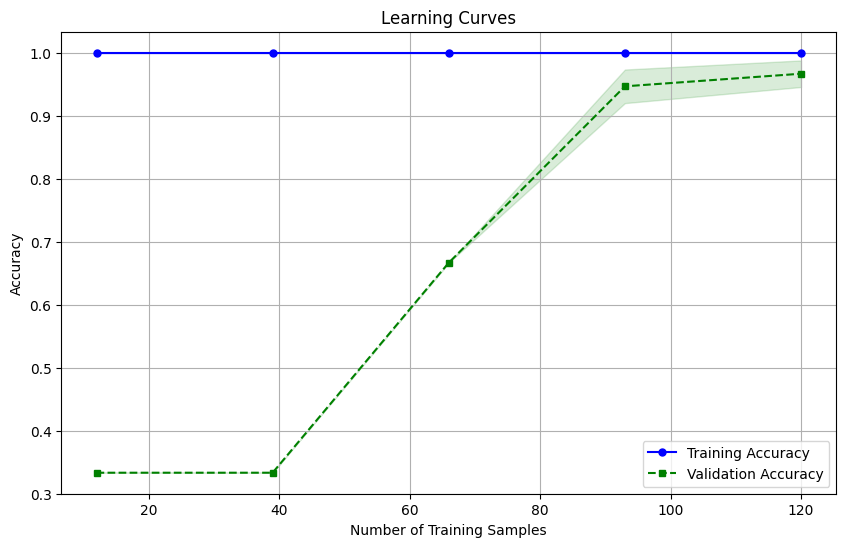

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curves')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("RandomForestClassifier_learning_curves.png")
plt.show()


### Grid Search

In [16]:
from sklearn.model_selection import GridSearchCV

### Define the parameter grid

In [17]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### Initialize the grid search

In [18]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

### Perform the grid search

In [ ]:
grid_search.fit(X_train, y_train)

### Get the best parameters and best score

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


### Initialize a new Random Forest Classifier with the best parameters

In [ ]:
model = RandomForestClassifier(**best_params)

### Fit the model to the entire training dataset

In [ ]:
model.fit(X_train, y_train)

### Predictions

In [ ]:
y_pred = model.predict(X_test)

### Calculate accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

### Visualize the confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_random_forest_classifier.png')
plt.show()